In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  
#内嵌绘画
import numpy as np
import sklearn 
import os
import pandas as pd
import time
import sys   #sys是system的缩写，用来获取操作系统和编译器的一些配置，设置及操作,如判断文件和文件夹是否存在，创建文件文件夹，获取系统版本之类的操作
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0-alpha0
sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.3
pandas 0.25.2
sklearn 0.21.3
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
mnist=keras.datasets.mnist

In [3]:
(x_train_all,y_train_all),(x_test,y_test)=mnist.load_data()
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [4]:
x_train=x_train/255.
x_vaild=x_valid/255.
x_test=x_test/255.

In [5]:
#独热编码
y_train_onehot=tf.keras.utils.to_categorical(y_train)
y_valid_onehot=tf.keras.utils.to_categorical(y_valid)
y_test_onehot=tf.keras.utils.to_categorical(y_test)

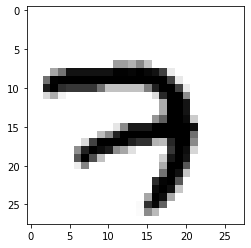

In [9]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show()
show_single_image(x_train[0])

In [14]:
model=tf.keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1))) #320
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu')    #(3*3)*32*64+64=18496
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(128,activation='relu'))  #[5*5*64]*128+128 =204928      
model.add(keras.layers.Dense(10,activation='softmax'))   #128*10+10     1290
          
model.summary()

SyntaxError: invalid syntax (<ipython-input-14-106f8f6bef7c>, line 6)

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [12]:
callbacks=[tf.keras.callbacks.EarlyStopping(patience=3,min_delta=1e-3)]
history=model.fit(x_train,y_train_onehot,validation_data=(x_valid,y_valid_onehot),epochs=10,callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 84us/sample - loss: 0.2119 - acc: 0.9372 - val_loss: 14.7593 - val_acc: 0.9734
Epoch 2/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.0875 - acc: 0.9729 - val_loss: 14.2904 - val_acc: 0.9758
Epoch 3/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.0598 - acc: 0.9809 - val_loss: 14.0411 - val_acc: 0.9756
Epoch 4/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.0439 - acc: 0.9857 - val_loss: 13.1226 - val_acc: 0.9782
Epoch 5/10
55000/55000 [==============================] - 4s 74us/sample - loss: 0.0330 - acc: 0.9894 - val_loss: 18.1585 - val_acc: 0.9780
Epoch 6/10
55000/55000 [==============================] - 4s 74us/sample - loss: 0.0297 - acc: 0.9903 - val_loss: 16.7874 - val_acc: 0.9778
Epoch 7/10
55000/55000 [==============================] - 4s 74us/sample - loss: 0.0232 - acc: 0.9924 - val_los

In [13]:
model.evaluate(x_test,y_test_onehot)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.0880 - acc: 0.9783


[0.08804294701616164, 0.9783]

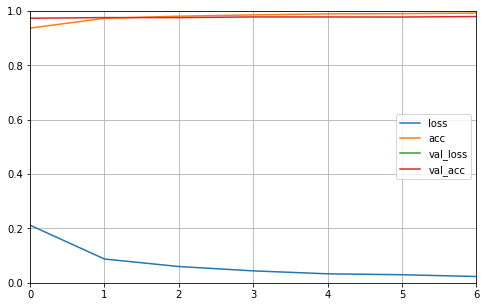

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)